# Importing Libraries

In [1]:
import numpy as np

import pandas as pd

import sklearn

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

# Reading Data

In [2]:
placement = pd.read_csv('Placement.csv')

# Examining Data

In [3]:
placement_data = placement.copy()

In [4]:
placement_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


placement.info()

In [5]:
placement.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# Check for missing data

<AxesSubplot: >

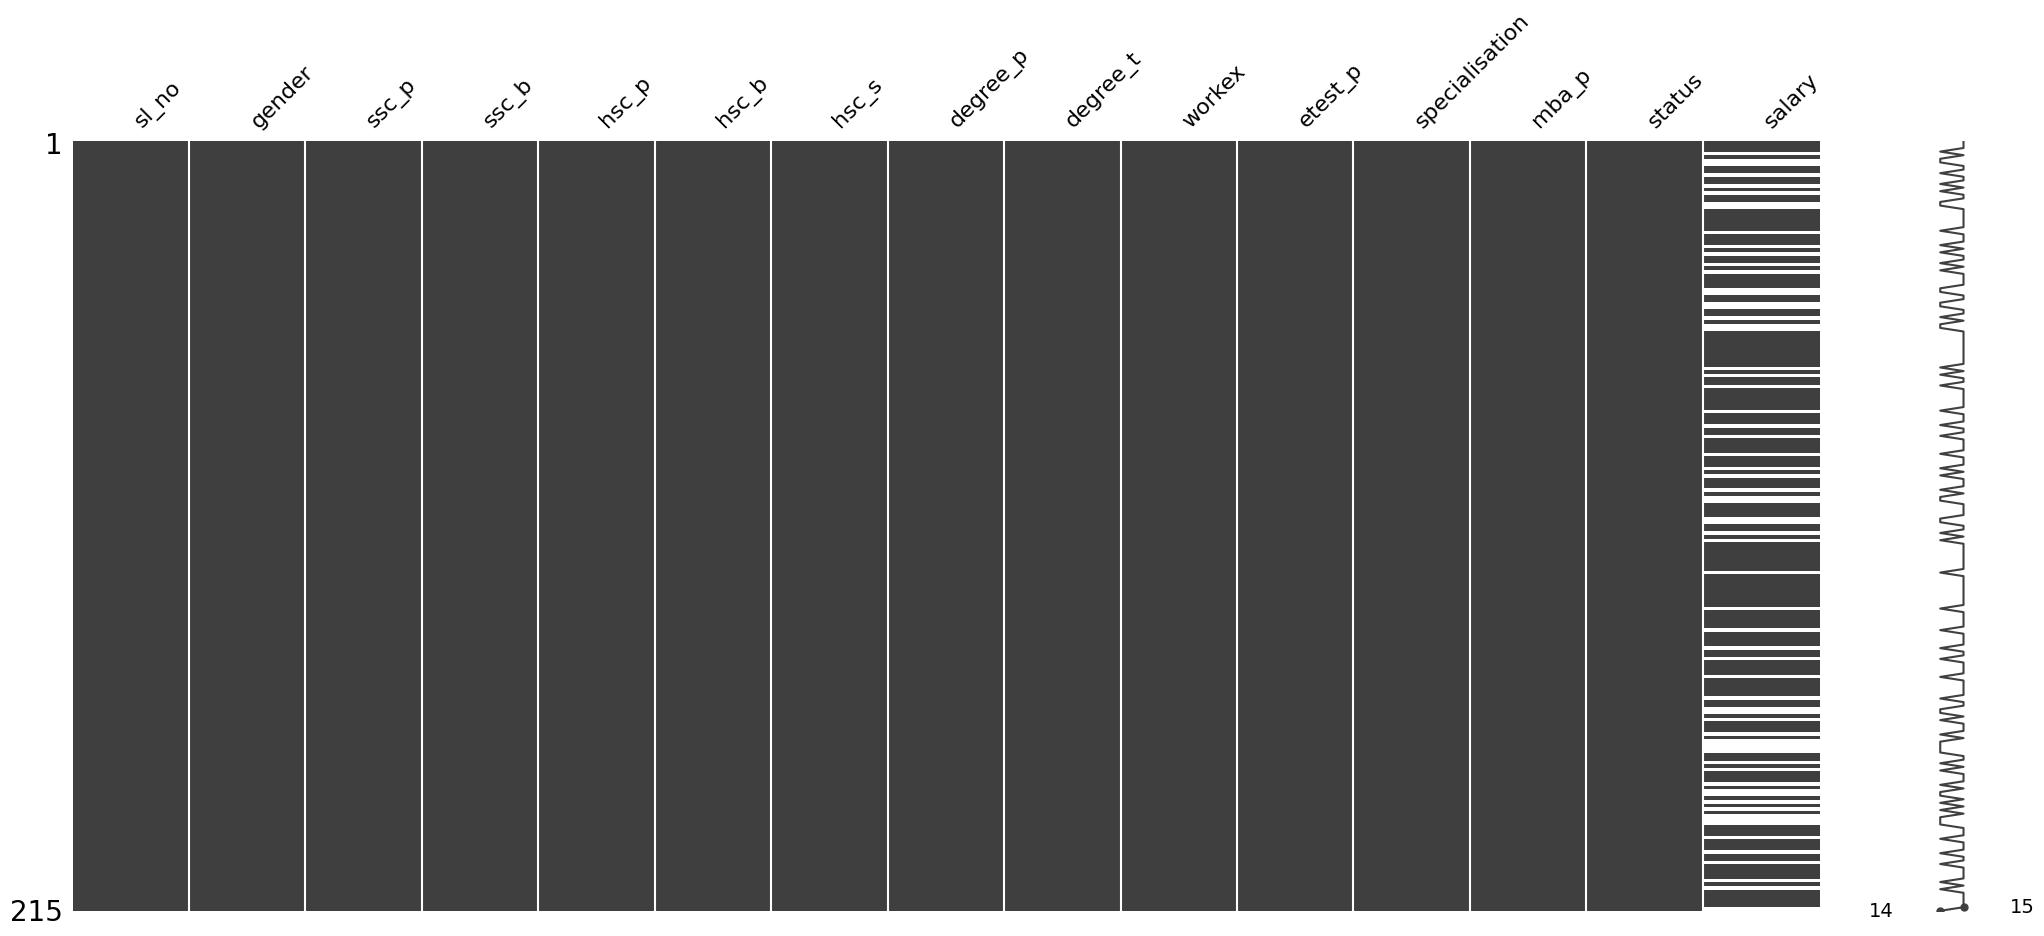

In [6]:
import missingno as msno

msno.matrix(placement)

clearly, We have null values in salary.

In [7]:
sum(placement['salary'].isnull())

67

We have 67 null values in salary.

# Missing Values (Handling)

Here, we can not drop the rows which has null values. Because null values is occurring for those rows in which students are not placed.

So, for filling null values, the best thing is, filling with '0'.

In [8]:
placement_data['salary'].fillna(value = 0,  inplace = True)

In [9]:
sum(placement_data['salary'].isnull())

0

<AxesSubplot: >

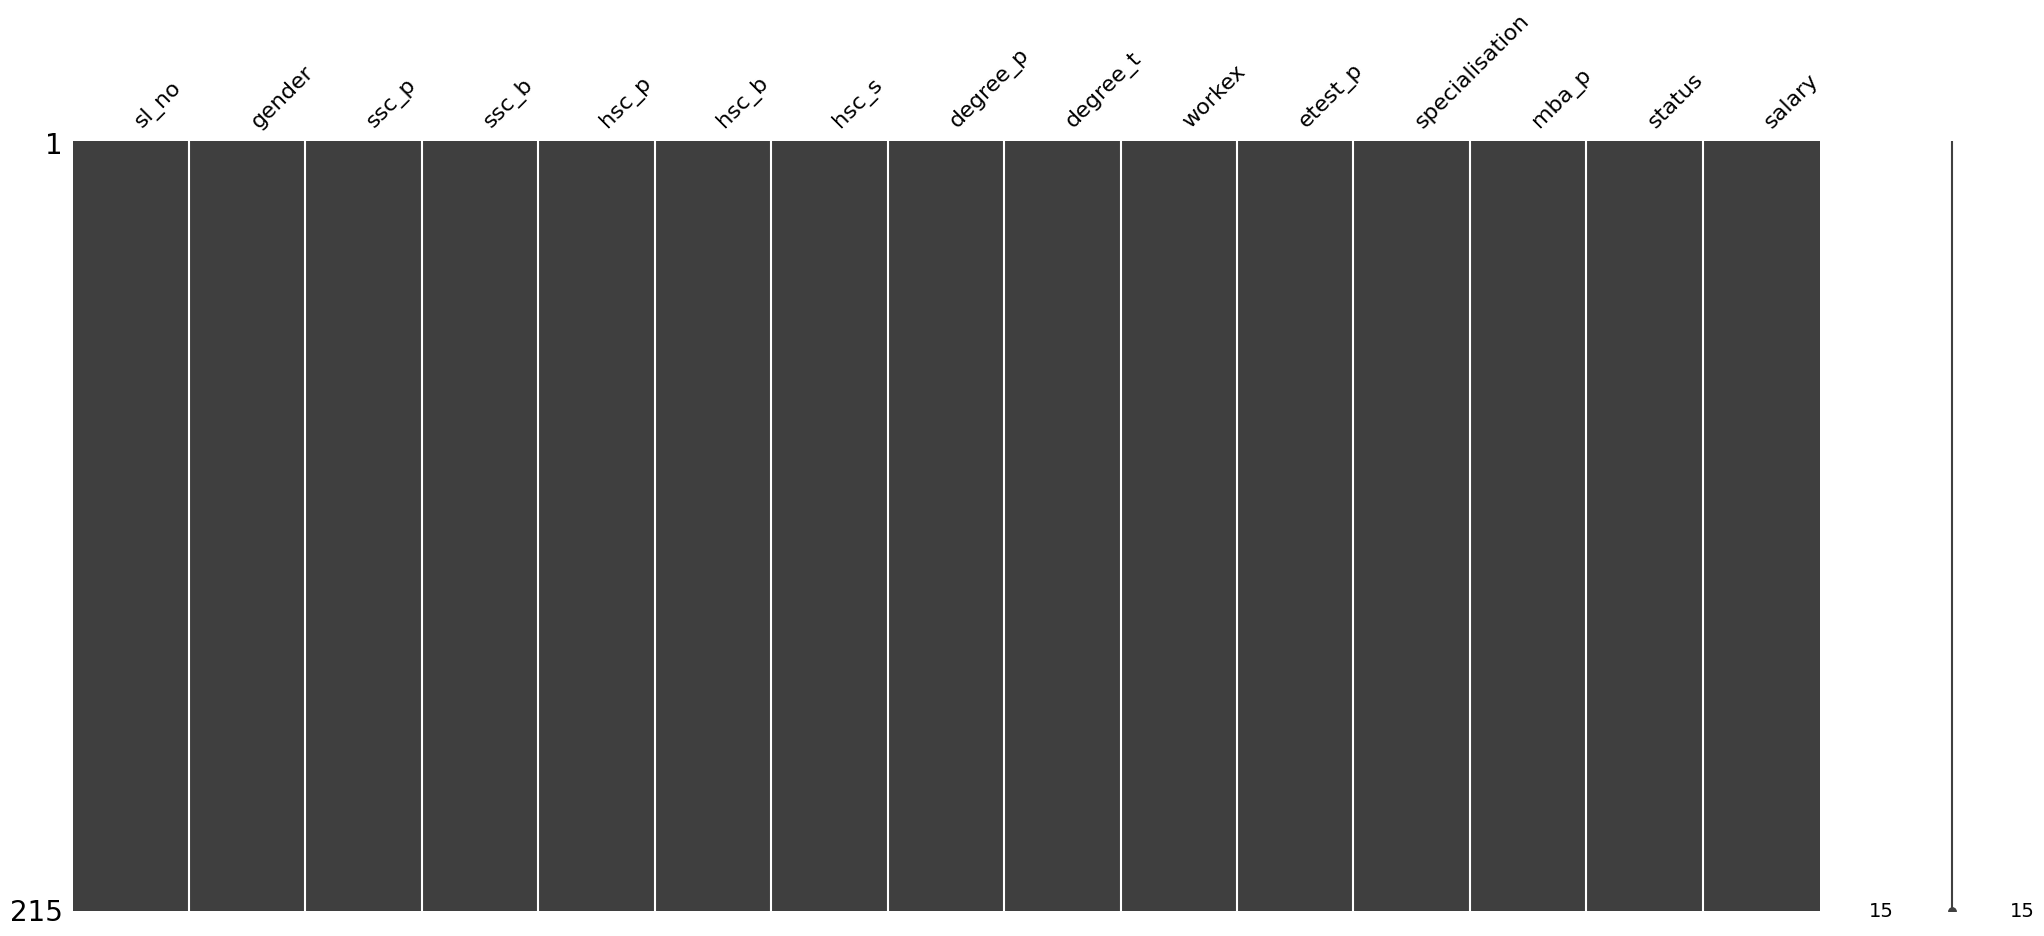

In [10]:
msno.matrix(placement_data)

In [11]:
placement_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Drop Unnecessary Features

<AxesSubplot: xlabel='ssc_b', ylabel='status'>

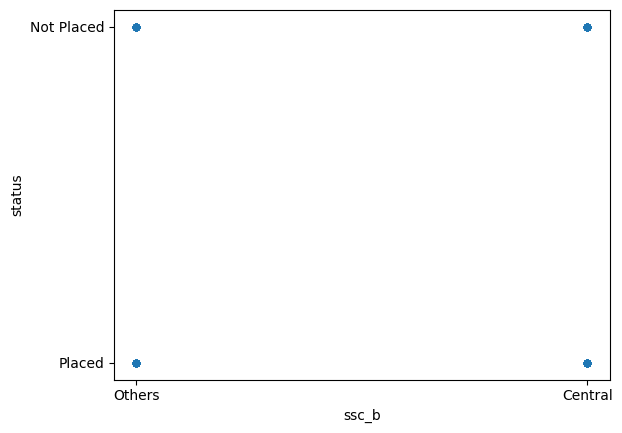

In [12]:
placement_data.plot(kind = "scatter", x = "ssc_b", y = "status", alpha = 0.8)

<AxesSubplot: xlabel='hsc_b', ylabel='status'>

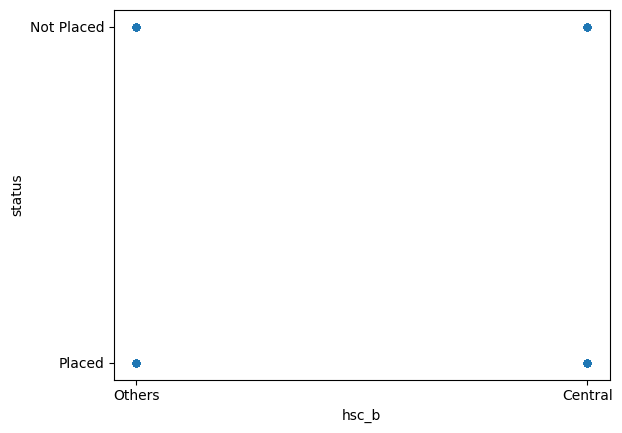

In [13]:
placement_data.plot(kind = "scatter", x = "hsc_b", y = "status", alpha = 0.8)

Cleary, boards of school education does not matter in placement. And there is no need of serial number. So drop these unnecessary features

In [14]:
placement_data.drop(['sl_no', 'ssc_b', 'hsc_b'], axis = 1, inplace = True)

In [15]:
placement_data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Outliers

*In a dataset of house prices, if you find a few houses priced at around $1.5 million—much higher than the median house price, they’re likely outliers.*

*When a large fraction of data is being labeled as outliers, they are not really outliers but can be attributed to a wider data distribution.*

***Outlier Detection Using Interquartile Range (IQR)***

In [16]:
plt.figure(figsize = (15, 10))

plt.style.use('seaborn-white')

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'secondary school percentage')

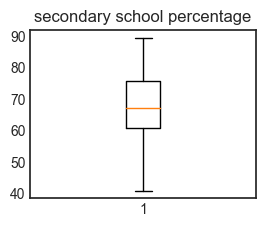

In [17]:
axis = plt.subplot(221)

plt.boxplot(placement_data['ssc_p'])

axis.set_title('secondary school percentage')


Text(0.5, 1.0, 'Higher Secondary School Percentage')

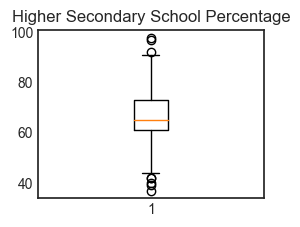

In [18]:
axis = plt.subplot(221)

plt.boxplot(placement_data['hsc_p'])

axis.set_title('Higher Secondary School Percentage')

we have majority of the outliers in hsc percentage. Clear them up!

In [19]:
placement['hsc_p'].describe()

count    215.000000
mean      66.333163
std       10.897509
min       37.000000
25%       60.900000
50%       65.000000
75%       73.000000
max       97.700000
Name: hsc_p, dtype: float64

In [20]:
# take 75 %
q1 = placement_data['hsc_p'].quantile(0.75)
print(q1)

73.0


In [21]:
# take 25 %
q2 = placement_data['hsc_p'].quantile(0.25)
print(q2)

60.9


In [22]:
IQR = q1 - q2

upper_limit = q1 + 1.5*IQR

lower_limit = q2 - 1.5*IQR

print(upper_limit)
print(lower_limit)

91.15
42.75


In [23]:
# filter the dataframe df_scores to retain records that lie in the permissible range.

placement_data_filtered = placement_data[(placement_data['hsc_p'] >= lower_limit )  &  (placement_data['hsc_p'] <= upper_limit)]

print(placement_data_filtered['hsc_p'])

0      91.00
1      78.33
2      68.00
3      52.00
4      73.60
       ...  
210    82.00
211    60.00
212    67.00
213    66.00
214    58.00
Name: hsc_p, Length: 207, dtype: float64


Text(0.5, 1.0, 'After removing outliers(hsc_p)')

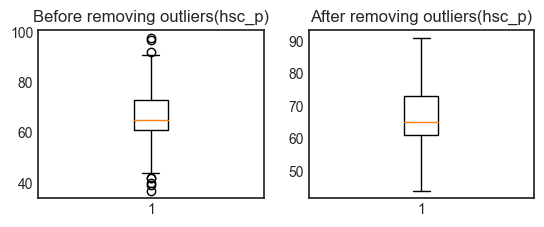

In [24]:
axis = plt.subplot(221)

plt.boxplot(placement_data['hsc_p'])

axis.set_title('Before removing outliers(hsc_p)')


axis = plt.subplot(222)

plt.boxplot(placement_data_filtered['hsc_p'])

axis.set_title('After removing outliers(hsc_p)')

We have removed the outliers

Text(0.5, 1.0, 'UG Degree Percentage')

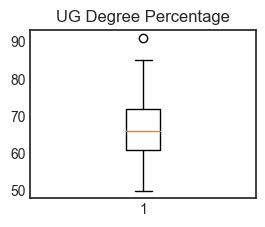

In [25]:
axis = plt.subplot(221)

plt.boxplot(placement_data['degree_p'])

axis.set_title('UG Degree Percentage')

Text(0.5, 1.0, 'Employability Percentage')

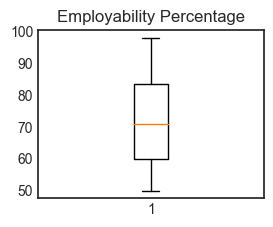

In [26]:
axis = plt.subplot(221)

plt.boxplot(placement_data['etest_p'])

axis.set_title('Employability Percentage')

'ssc_p', 'degree_p' and 'etest_p' have not outliers

In [27]:
placement_data_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Data Visualization

**1. Catagorical Features**

In [28]:
plt.figure(figsize = (15, 7))

plt.style.use('seaborn-white')

<Figure size 1500x700 with 0 Axes>

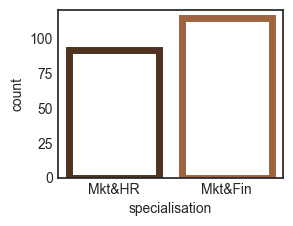

In [29]:
# specialisation

plt.subplot(221)

axis = sns.countplot(x = 'specialisation',  data = placement_data_filtered,  facecolor = (0, 0, 0, 0), linewidth = 5, edgecolor=sns.color_palette("copper", 3))

Candidates from marketing and finance specialisation are high

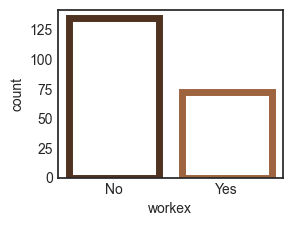

In [30]:
# work experience

plt.subplot(221)

axis = sns.countplot(x = 'workex',  data = placement_data_filtered,  facecolor = (0, 0, 0, 0), linewidth = 5, edgecolor=sns.color_palette("copper", 3))

Most of the candidate do not have work experience

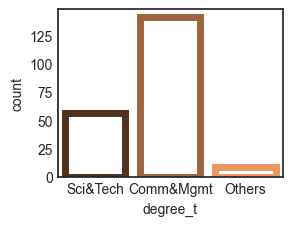

In [31]:
# Degree Type

plt.subplot(221)

axis = sns.countplot(x = 'degree_t',  data = placement_data_filtered,  facecolor = (0, 0, 0, 0), linewidth = 5, edgecolor=sns.color_palette("copper", 3))

candidates who did commerce as their undergrad, are high

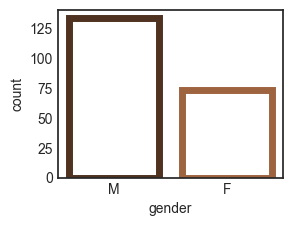

In [32]:
# gender

plt.subplot(221)

axis = sns.countplot(x = 'gender',  data = placement_data_filtered,  facecolor = (0, 0, 0, 0), linewidth = 5, edgecolor=sns.color_palette("copper", 3))

Number of male candidates are higher than female candidates

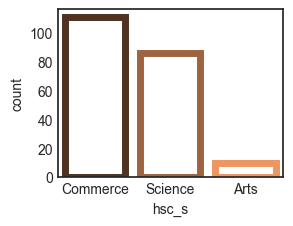

In [33]:
# Higher Secondary Specialisation

plt.subplot(221)

axis = sns.countplot(x = 'hsc_s',  data = placement_data_filtered,  facecolor = (0, 0, 0, 0), linewidth = 5, edgecolor=sns.color_palette("copper", 3))

candidates who did commerce as their hsc course, are high

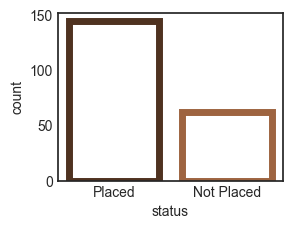

In [34]:
# Recruitment Status

plt.subplot(221)

axis = sns.countplot(x = 'status',  data = placement_data_filtered,  facecolor = (0, 0, 0, 0), linewidth = 5, edgecolor=sns.color_palette("copper", 3))

Unplaced candidates are higher than placed candidates

**2. Salary Distribution (placed)**

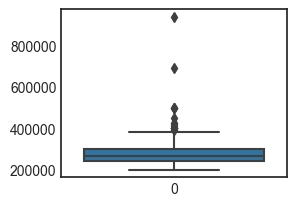

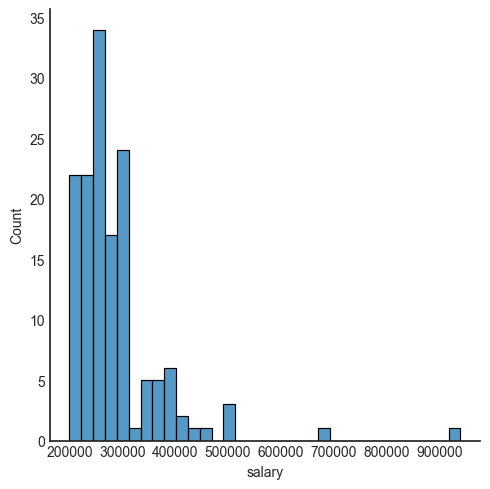

In [35]:
axis = plt.subplot(221)

placement_data_filtered_placed = placement_data_filtered[placement_data_filtered.salary != 0]

sns.boxplot(placement_data_filtered_placed['salary'])

sns.displot(placement_data_filtered_placed['salary'])

most of the students are getting salary in between 2 to 4 lakhs

**3. Salary Distribution (Employability)**

<AxesSubplot: xlabel='etest_p', ylabel='salary'>

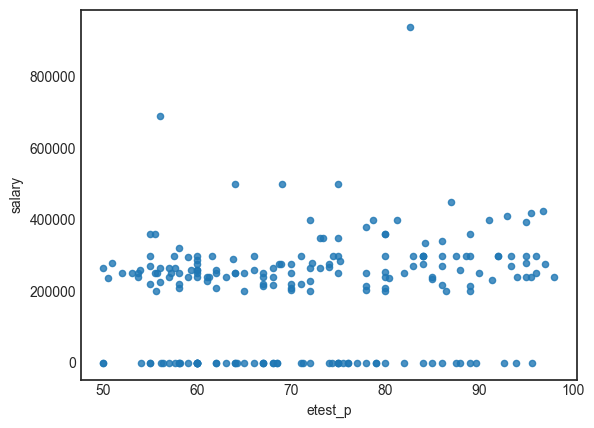

In [36]:
placement_data_filtered.plot(kind = "scatter", x = "etest_p", y = "salary", alpha = 0.8)

most of the candidates who scored around 55 to 60 percentage got decent amount around 3 LPA

There is very less number of students who have package greater than 4 LPA

There are many students that are not placed so far clearly can be seen in the buttom of the graph

**4. Percentage**

In [37]:
placement_data_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


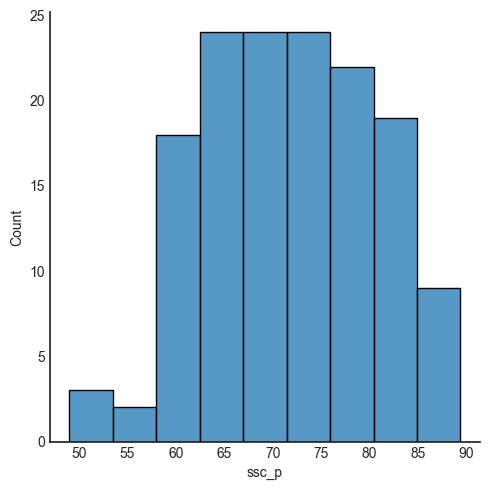

In [38]:
sns.displot(placement_data_filtered_placed['ssc_p'])

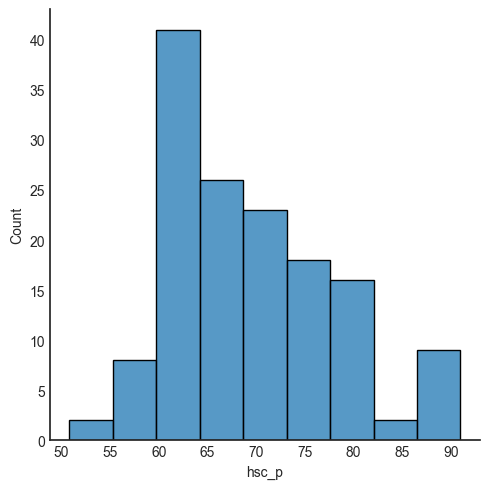

In [39]:
sns.displot(placement_data_filtered_placed['hsc_p'])



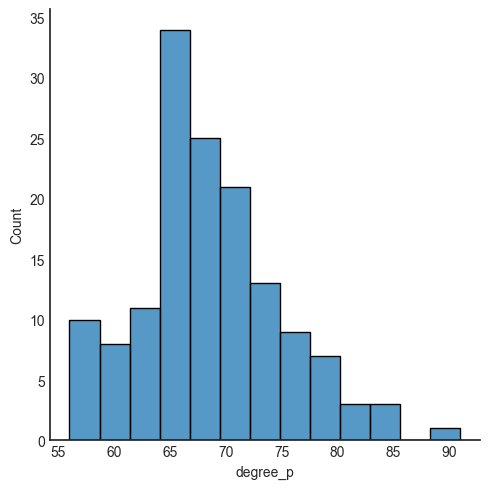

In [40]:
sns.displot(placement_data_filtered_placed['degree_p'])



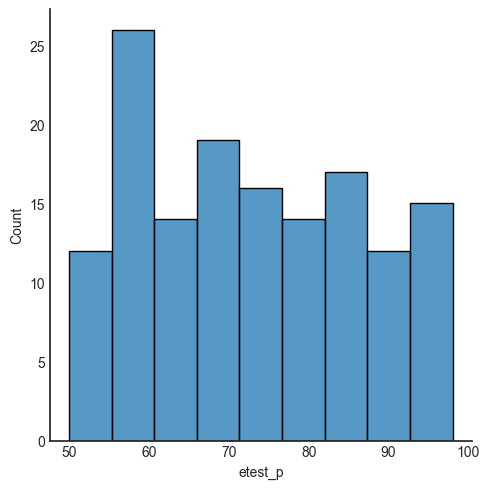

In [41]:
sns.displot(placement_data_filtered_placed['etest_p'])



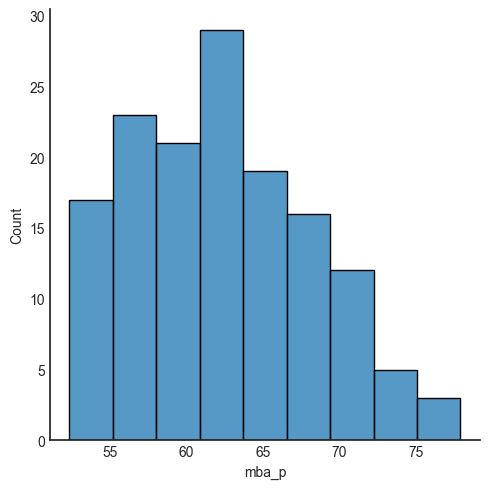

In [42]:
sns.displot(placement_data_filtered_placed['mba_p'])


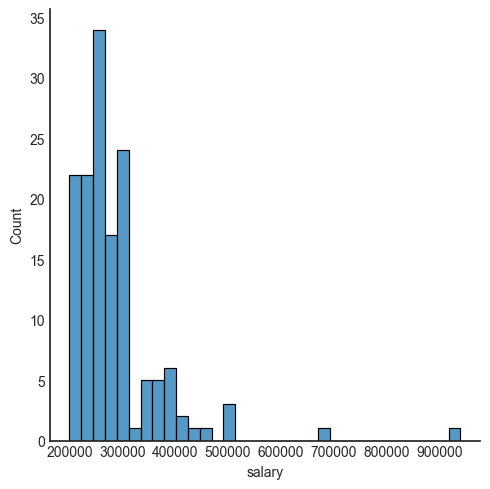

In [43]:
sns.displot(placement_data_filtered_placed['salary'])

mostly candidates have scored in range of 60 to 80 percentage. And the distributions follow normal distribution except salary.

**5. Salary Distribution (Work Experience)**

In [44]:
placement_data_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


<AxesSubplot: xlabel='workex', ylabel='count'>

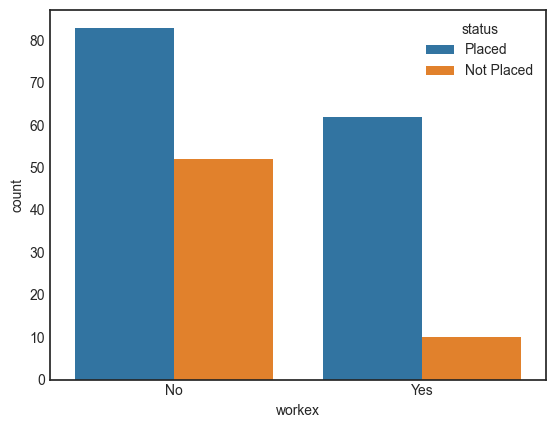

In [45]:
sns.countplot(x = 'workex',hue = "status",data = placement_data_filtered)

number of unexperienced candidates are hired much in comparasion to experienced ones. So clearly, work experience doesn't influence a candidate in the placement process

**6. Placement Status (MBA Marks)**

In [46]:
placement_data_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


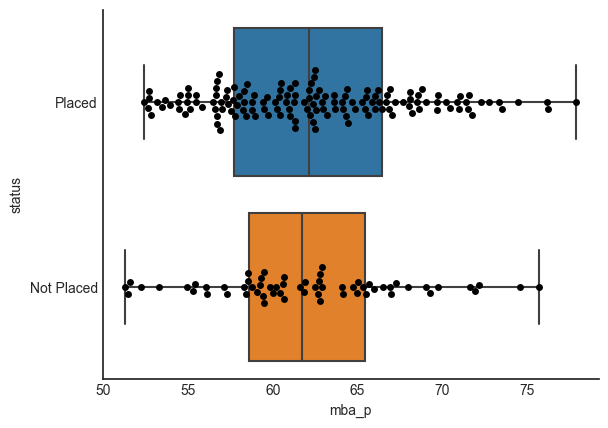

In [47]:
g = sns.boxplot(y = "status", x = 'mba_p',data = placement_data_filtered)

g = sns.swarmplot(y = "status", x = 'mba_p',data = placement_data_filtered, color = 'black')

sns.despine()

**7. Gender plays role ?**

In [48]:
placement_data_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


<AxesSubplot: xlabel='specialisation', ylabel='salary'>

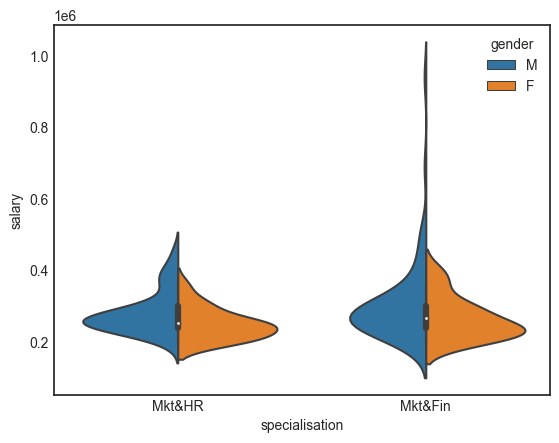

In [49]:
# sns.stripplot(x ='gender', y ='salary', data = placement_data_filtered_placed, jitter = True, dodge = True)

sns.violinplot(x ='specialisation', y ='salary', data = placement_data_filtered_placed, hue ='gender', split = True)


male candidates grabbed higher package than female candidates. And average salary is also high of male candidates. Male candidates are hired more than female candidates.

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**8. Percentage plays role in placement?**

*Find correlation of salary with other features*

In [50]:
placement_data_filtered_placed.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,M,82.00,64.00,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0


<AxesSubplot: >

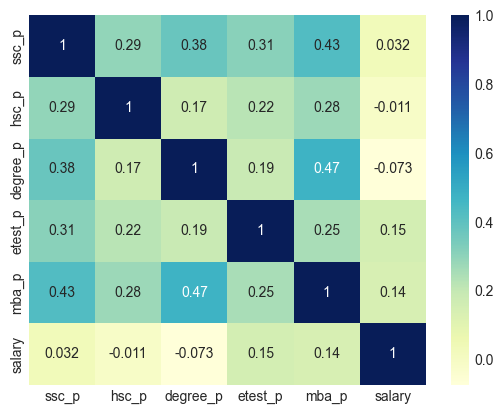

In [51]:
sns.heatmap(placement_data_filtered_placed.corr(), annot = True, cmap = 'YlGnBu')

Clearly, Salary is not depend on acadamics

<h1>Data Preprocessing</h1>

<h2>1. Label Encoding</h2>

In [52]:
placement_data_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [53]:
from sklearn.preprocessing import LabelEncoder

# creating a list of features that are to be label encoded

label = ['gender', 'workex', 'specialisation', 'status']


# creating instance of Label Encoder

label_encoder = LabelEncoder()


# Traverse the list

for label_df in label:
    
    placement_data_filtered[label_df] = label_encoder.fit_transform(placement_data_filtered[label_df])


In [54]:
placement_data_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


<h2>2. One-Hot Encoding </h2>

In [55]:
dummy_hsc_s = pd.get_dummies(placement_data_filtered['hsc_s'],  prefix='dummy')

dummy_degree_t = pd.get_dummies(placement_data_filtered['degree_t'],  prefix='dummy')

placement_data_filtered_hsc_degree = pd.concat([placement_data_filtered, dummy_hsc_s, dummy_degree_t],  axis = 1)

placement_data_filtered_hsc_degree.drop(['hsc_s', 'degree_t', 'salary'],  axis = 1,  inplace = True)

In [56]:
placement_data_filtered_hsc_degree.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


<h2>3. Target variable(x) and Predict variable(Y) </h2>

In [57]:
x = placement_data_filtered_hsc_degree.drop(['status'], axis = 1)

y = placement_data_filtered_hsc_degree.status

In [58]:
x.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,0,1,0,1,0,0


In [59]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: int32

<h2>4. Train and Test Split </h2>

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,  train_size = 0.8,  random_state = 42)


In [61]:
print(x_train.shape)

(165, 14)


In [62]:
print(x_test.shape)

(42, 14)


In [63]:
print(y_train.shape)

(165,)


In [64]:
print(y_test.shape)

(42,)


<h1> Machine Learning Models </h1>

In [65]:
def print_scores(scores):
    
    print("Scores: ", scores)
    
    print("Mean: ", scores.mean())
    
    print("Standard Deviation: ", scores.std())

<h3>1. Decision Tree </h3>

In [66]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

dec_tree_reg = DecisionTreeRegressor()

dec_tree_reg.fit(x_train,  y_train)

y_predict = dec_tree_reg.predict(x_test)

print(y_predict)

[0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.]


In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.7380952380952381


***Evaluating the Mode***

In [68]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)

rmse = np.sqrt(mse)

rmse

0.511766315719159

***Using Better Evaluation Technique - Cross Validation***

In [69]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dec_tree_reg, x_test, y_test, scoring = "neg_mean_squared_error", cv = 10)

rmse_scores = np.sqrt(-scores)

print_scores(rmse_scores)

Scores:  [0.4472136  0.4472136  0.5        0.70710678 0.         0.
 0.5        0.         0.         0.5       ]
Mean:  0.3101533972186463
Standard Deviation:  0.2623068245275608


<h3>2. Logistic Regression</h3>

In [70]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

log_reg = LogisticRegression()

log_reg.fit(x_train,  y_train)

y_predict = log_reg.predict(x_test)

print(y_predict)

[1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 0 0 0]


In [71]:
print("Accuracy:",  metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.8095238095238095


In [72]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(log_reg.score(x_test, y_test)))

Variance score: 0.8095238095238095


***Evaluate the Mode***

In [73]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)

rmse = np.sqrt(mse)

rmse

0.4364357804719847

***Using Better Evaluation Technique - Cross Validation***

In [74]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, x_test, y_test, scoring = "neg_mean_squared_error", cv = 10)

rmse_scores = np.sqrt(-scores)

print_scores(rmse_scores)

Scores:  [0.4472136  0.77459667 0.5        0.70710678 0.5        0.5
 0.         0.         0.5        0.        ]
Mean:  0.3928917045927989
Standard Deviation:  0.2750201964623051


<h3>3. Random Forest </h3>

In [75]:
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

ran_for_cl = RandomForestClassifier()

ran_for_cl.fit(x_train,y_train)

y_pred  =  ran_for_cl.predict(x_test)

print(y_pred)

[1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 0]


In [76]:
print("Accuracy:",  metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8809523809523809


In [77]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(ran_for_cl.score(x_test, y_test)))

Variance score: 0.8809523809523809


***Evaluate the Mode***

In [78]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

rmse

0.3450327796711771

***Using Better Evaluation Technique - Cross Validation***

In [79]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ran_for_cl, x_test, y_test, scoring = "neg_mean_squared_error", cv = 10)

rmse_scores = np.sqrt(-scores)

print_scores(rmse_scores)

Scores:  [0.         0.4472136  0.5        0.70710678 0.5        0.
 0.         0.         0.5        0.5       ]
Mean:  0.3154320376686505
Standard Deviation:  0.2655233127471165


<h3>4. K Nearest Neighbours</h3>

In [80]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

knn = KNeighborsClassifier()

knn.fit(x_train,  y_train)

y_predict = knn.predict(x_test)

print(y_predict)

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 1 1]


In [81]:
print("Accuaracy: ",  metrics.accuracy_score(y_test, y_predict))

Accuaracy:  0.7380952380952381


In [82]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(knn.score(x_test, y_test)))

Variance score: 0.7380952380952381


**Evaluate the Mode**

In [83]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)

rmse = np.sqrt(mse)

rmse

0.511766315719159

***Using Better Evaluation Technique - Cross Validation***

In [84]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, x_test, y_test, scoring = "neg_mean_squared_error", cv = 10)

rmse_scores = np.sqrt(-scores)

print_scores(rmse_scores)

Scores:  [0.         0.63245553 0.5        0.70710678 0.5        0.
 0.         0.         0.5        0.5       ]
Mean:  0.33395623132202235
Standard Deviation:  0.28013074726133136


<h3>5. Support Vector Machine </h3>

In [85]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train,  y_train)

y_pred = svc.predict(x_test)

print(y_pred)

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1]


In [86]:
print("Accuaracy: ",  metrics.accuracy_score(y_test, y_pred))

Accuaracy:  0.7619047619047619


In [87]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(svc.score(x_test, y_test)))   #  model.score() and metrics.accuracy_score do same thing

Variance score: 0.7619047619047619


***Evaluating the Mode***

In [88]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

rmse

0.4879500364742666

***Using Better Evaluation Technique - Cross Validation***

In [89]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc, x_test, y_test, scoring = "neg_mean_squared_error", cv = 10)

rmse_scores = np.sqrt(-scores)

print_scores(rmse_scores)

Scores:  [0.4472136 0.4472136 0.5       0.5       0.5       0.5       0.5
 0.5       0.5       0.5      ]
Mean:  0.4894427190999916
Standard Deviation:  0.021114561800016828


In [90]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [91]:
placement_data_filtered_hsc_degree.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [92]:
list(placement['specialisation'])

['Mkt&HR',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&HR',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&HR',
 'Mkt&HR',
 'Mkt&HR',
 'Mkt&HR',
 'Mkt&HR',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&HR',
 'Mkt&HR',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 'Mkt&Fin',
 '